## Checking the access of GPU

In [1]:
!nvidia-smi

Tue Jul 23 13:40:19 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   44C    P8               9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

## Install packages

In [2]:
!pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.8/823.8 kB 7.0 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl (176.2 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-m

In [3]:
!pip install roboflow

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.7/76.7 kB 2.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.7/178.7 kB 11.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 7.4 MB/s eta 0:00:00
  Attempting uninstall: chardet
    Found existing installation: chardet 5.2.0
    Uninstalling chardet-5.2.0:
      Successfully uninstalled chardet-5.2.0


## Download the Dataset from Roboflow

In [4]:
from roboflow import Roboflow
rf = Roboflow(api_key="B0eQemAfybOzBrq7Rq6F")
project = rf.workspace("indiancurrency-gyydi").project("notedetection-7foeq")
version = project.version(4)
dataset = version.download("yolov8")


loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics==8.0.196 is required but found version=8.2.63, to fix: `pip install ultralytics==8.0.196`



Extracting Dataset Version Zip to NoteDetection-4 in yolov8:: 100%|██████████| 2245/2245 [00:00<00:00, 4641.00it/s]


In [5]:
%pwd

'/content'

In [10]:
dataset.location

'/content/NoteDetection-4'

In [9]:
%cd /content/NoteDetection-4/

/content/NoteDetection-4


## Custom Training Begins

In [10]:
!yolo task=detect mode=train model=yolov8n.pt data=data.yaml epochs=300 imgsz=224 plots=True

100% 6.25M/6.25M [00:32<00:00, 203kB/s]
Ultralytics YOLOv8.2.63 🚀 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=data.yaml, epochs=300, time=None, patience=100, batch=16, imgsz=224, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=Tru

In [11]:
!ls runs/detect/train/

args.yaml					    PR_curve.png	   val_batch0_pred.jpg
confusion_matrix_normalized.png			    R_curve.png		   val_batch1_labels.jpg
confusion_matrix.png				    results.csv		   val_batch1_pred.jpg
events.out.tfevents.1721742648.cb7b42ffce0c.3060.0  results.png		   val_batch2_labels.jpg
F1_curve.png					    train_batch0.jpg	   val_batch2_pred.jpg
labels_correlogram.jpg				    train_batch1.jpg	   weights
labels.jpg					    train_batch2.jpg
P_curve.png					    val_batch0_labels.jpg


## Display the Confusion Matrix

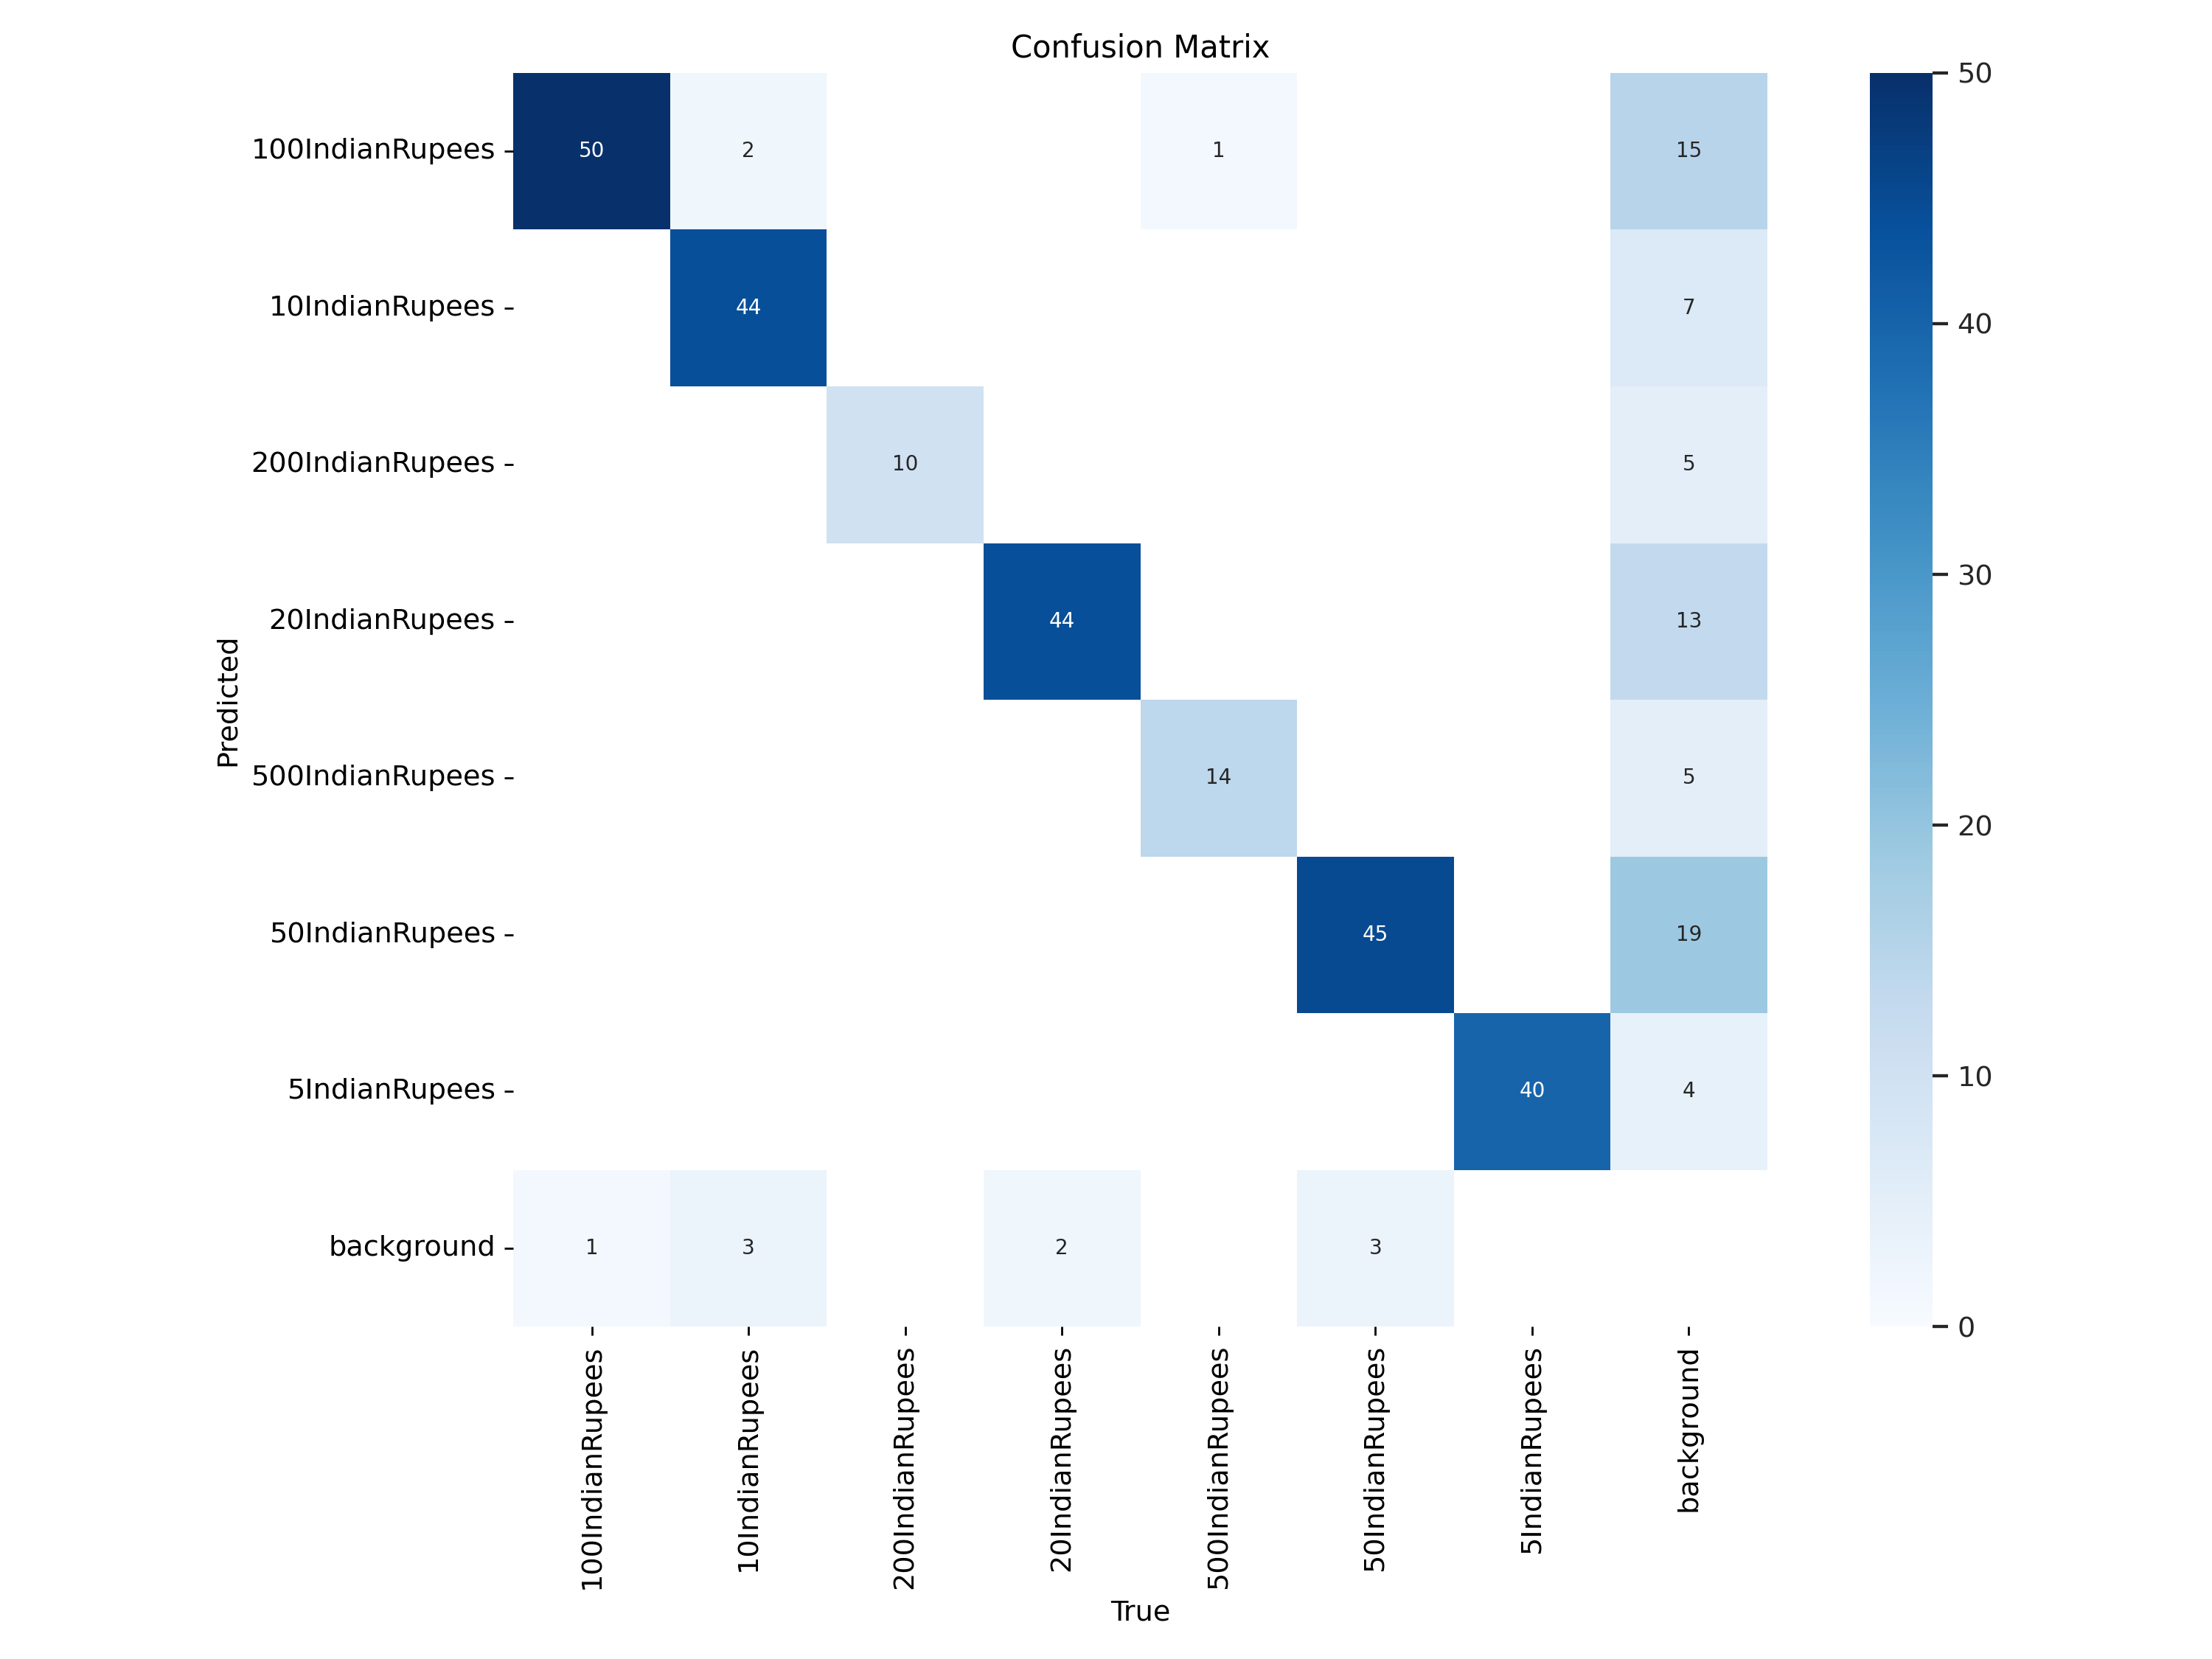

In [16]:
from IPython.display import display, Image
Image(filename='runs/detect/train/confusion_matrix.png',width=600)

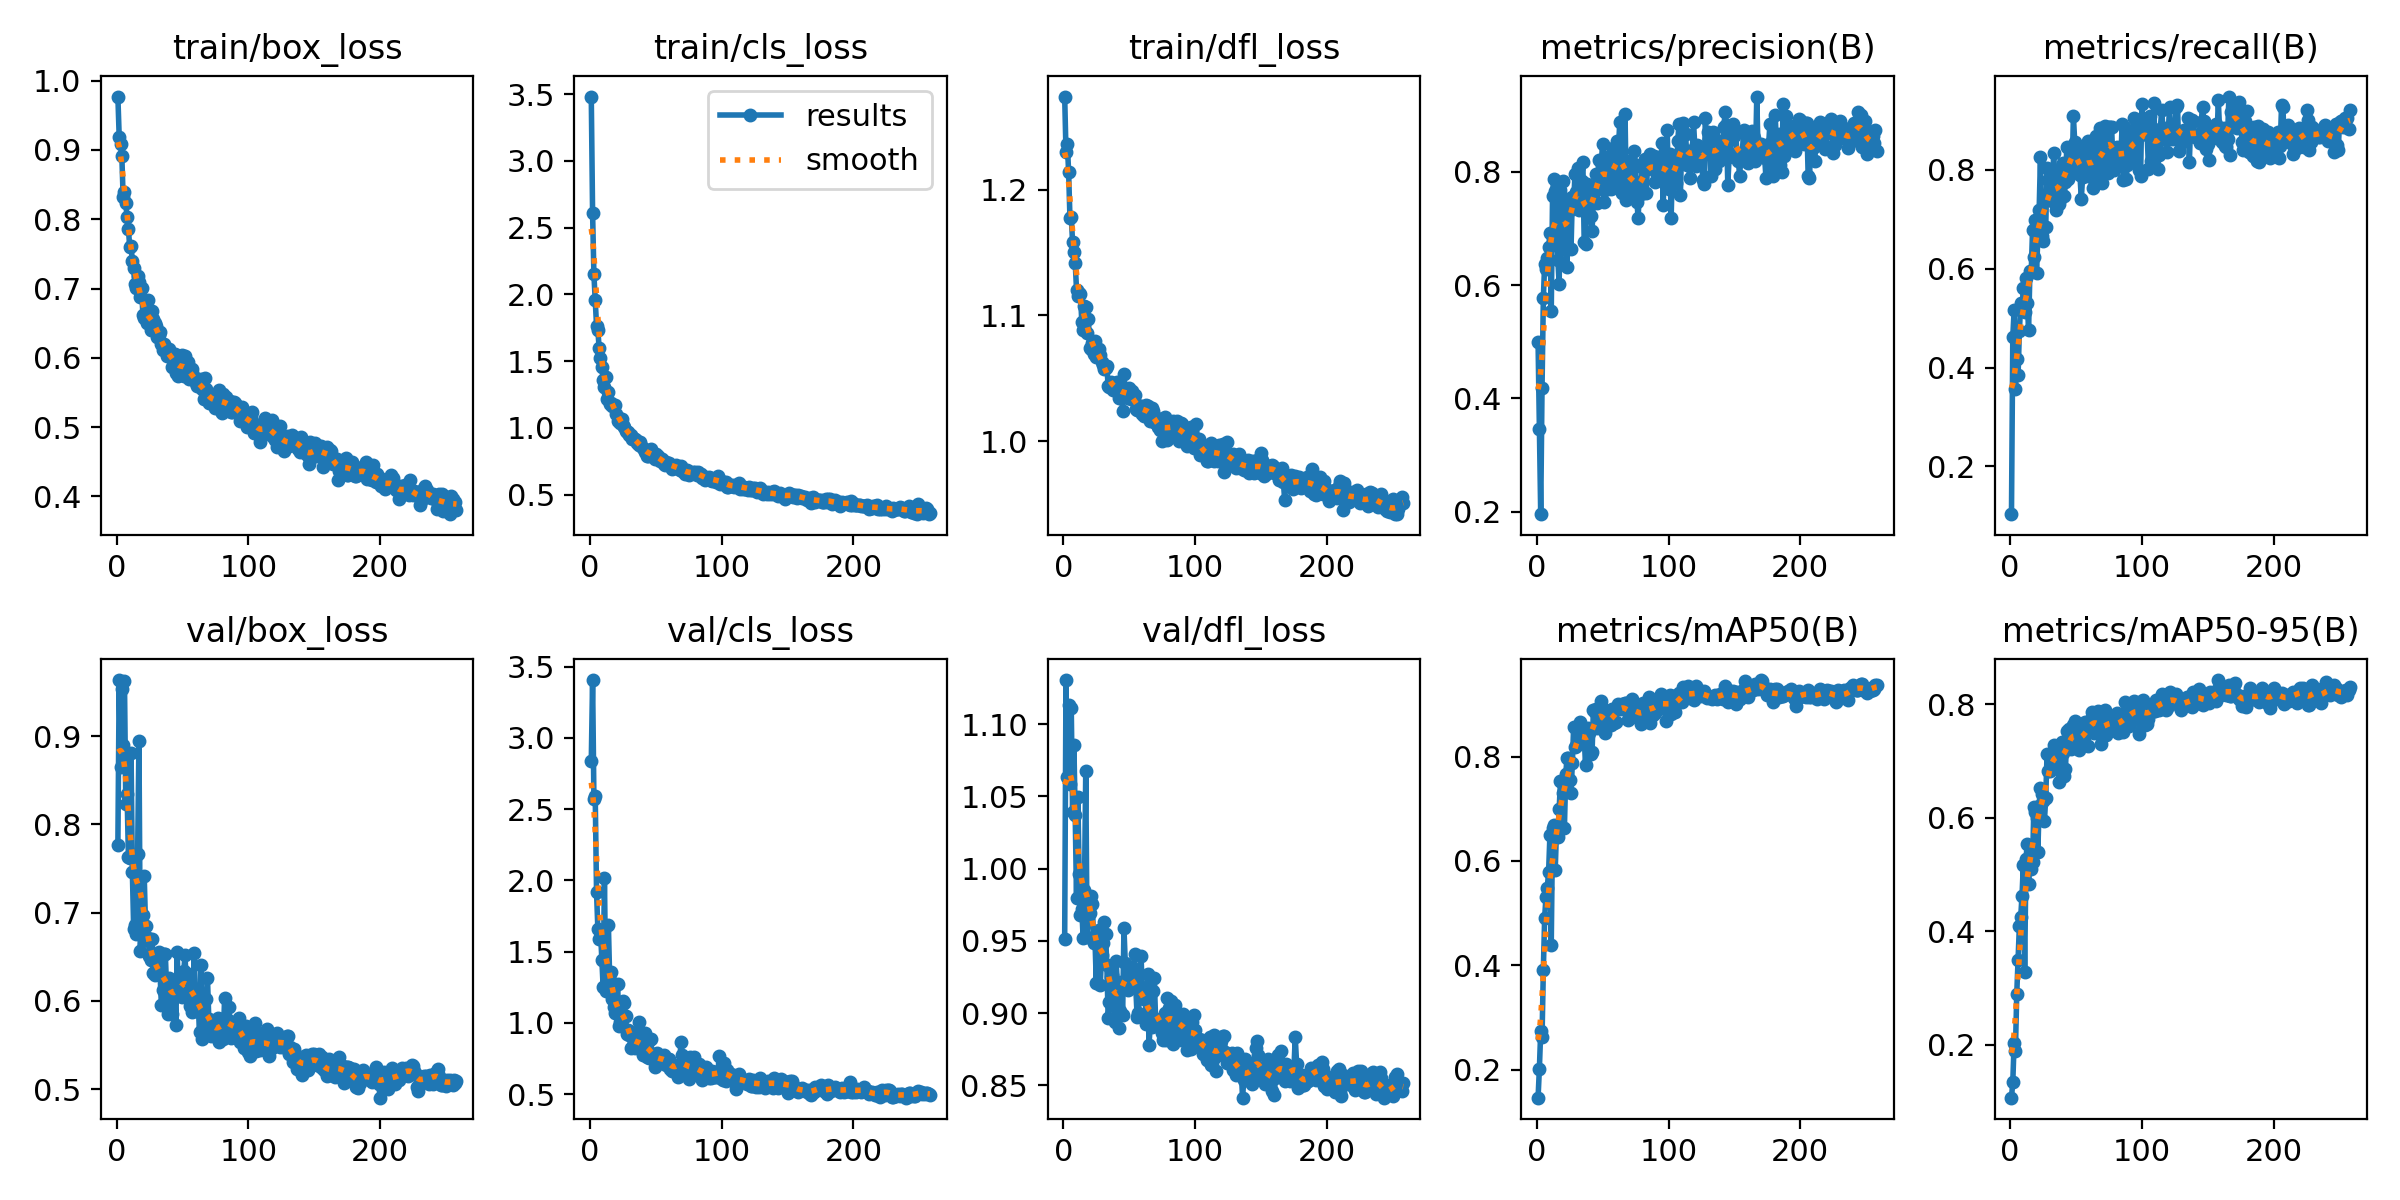

In [18]:
Image(filename='runs/detect/train/results.png',width=600)

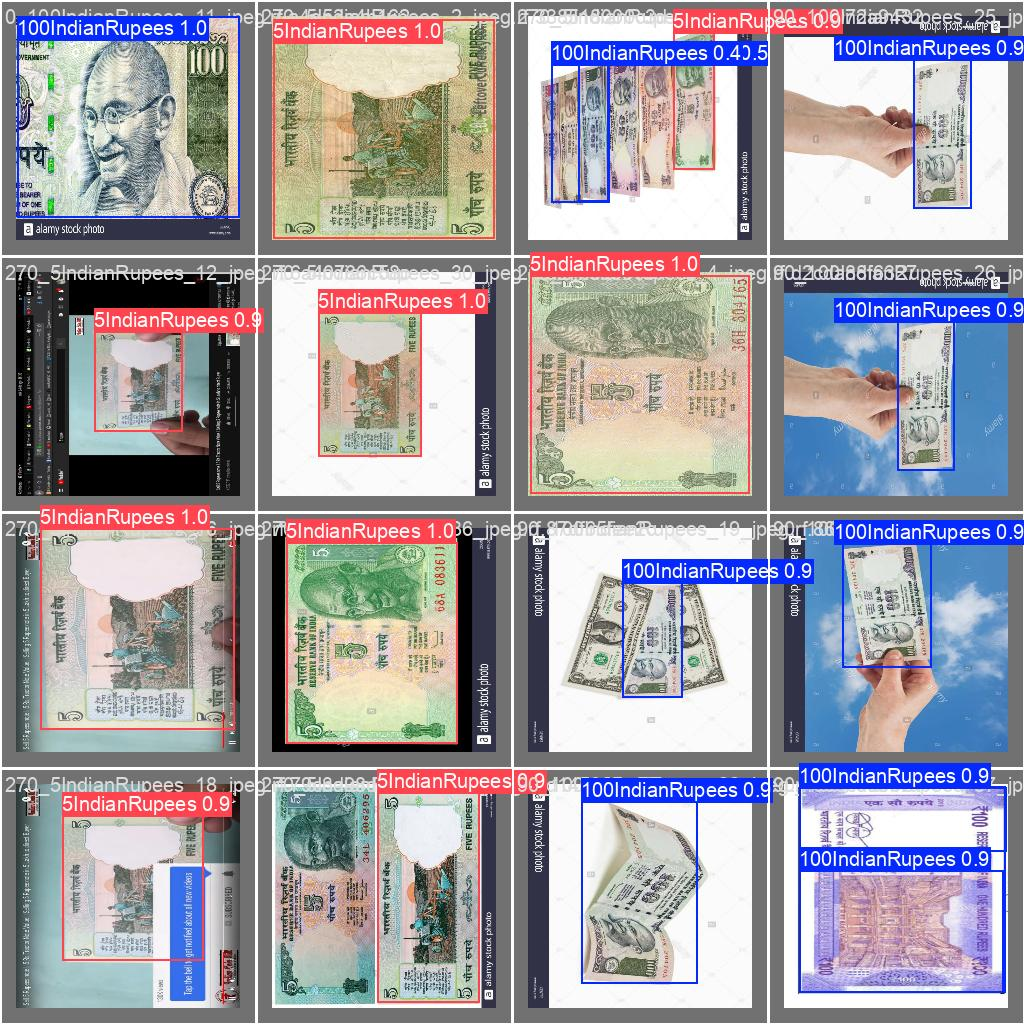

In [20]:
Image(filename='runs/detect/train/val_batch0_pred.jpg', width=600)

In [21]:
%ls runs/detect/train/weights/

best.pt  last.pt


In [22]:
%pwd

'/content/NoteDetection-4'

## Validate the Custom Model

In [32]:
!yolo task=detect mode=val model=runs/detect/train/weights/best.pt data=data.yaml

WARNING ⚠️ Ultralytics settings reset to default values. This may be due to a possible problem with your settings or a recent ultralytics package update. 
View settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.yaml'
Update settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'.
Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3007013 parameters, 0 gradients, 8.1 GFLOPs
val: Scanning /content/NoteDetection-4/valid/labels.cache... 219 images, 0 backgrounds, 0 corrupt: 100% 219/219 [00:00<?, ?it/s]
WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 4, len(boxes) = 259. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 14/14 [00:

## Inference Custom Model

In [33]:
!yolo task=detect mode=predict model=/content/NoteDetection-4/runs/detect/train/weights/best.pt conf=0.25 source={dataset.location}/valid/images save=True

Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3007013 parameters, 0 gradients, 8.1 GFLOPs

WARNING ⚠️ NMS time limit 0.550s exceeded
image 1/219 /content/NoteDetection-4/valid/images/0_100IndianRupees_11_jpeg.rf.a4e53e4b1625864a65a0dbc2408b9af2.jpg: 224x224 1 100IndianRupees, 23.6ms
image 2/219 /content/NoteDetection-4/valid/images/0_100IndianRupees_31_jpeg.rf.b448abb4da885b3149ee0a0370e34b9e.jpg: 224x224 1 100IndianRupees, 10.4ms
image 3/219 /content/NoteDetection-4/valid/images/0_100IndianRupees_33_jpeg.rf.bad065fde7db088c91a4fffb115c2352.jpg: 224x224 1 100IndianRupees, 7.4ms
image 4/219 /content/NoteDetection-4/valid/images/0_100IndianRupees_38_jpeg.rf.8be8c4f20118fc7fe98f99ee25e6012d.jpg: 224x224 1 100IndianRupees, 11.7ms
image 5/219 /content/NoteDetection-4/valid/images/0_100IndianRupees_40_jpeg.rf.054a840b21ff2398a4e4a7625bc69533.jpg: 224x224 5 100IndianRupeess, 10.4ms
image 6/219 /content/NoteDetection-

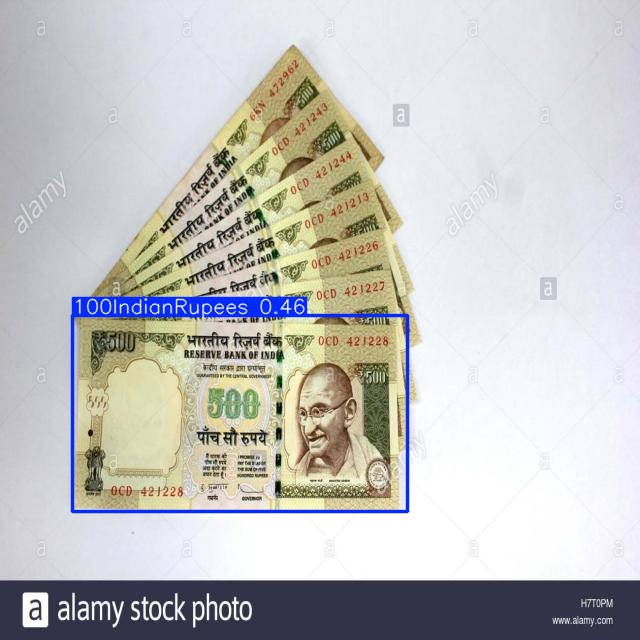

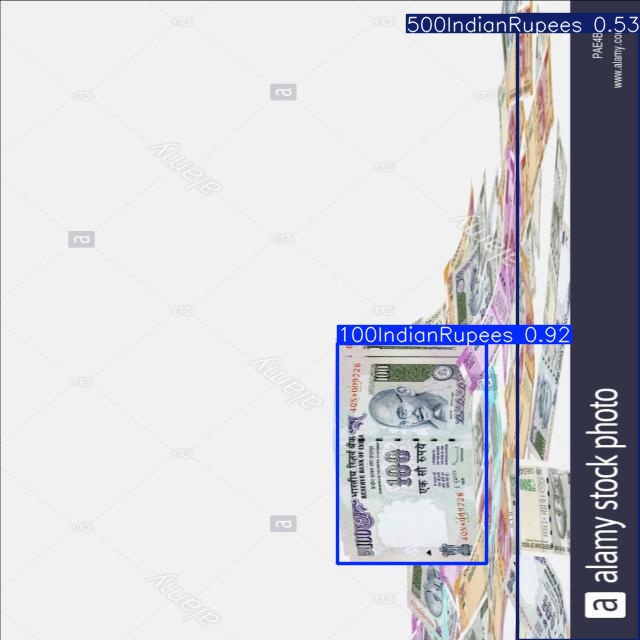

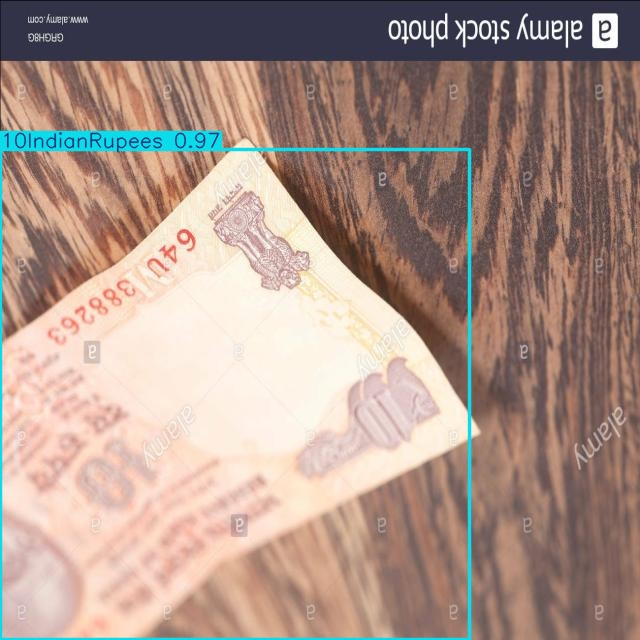

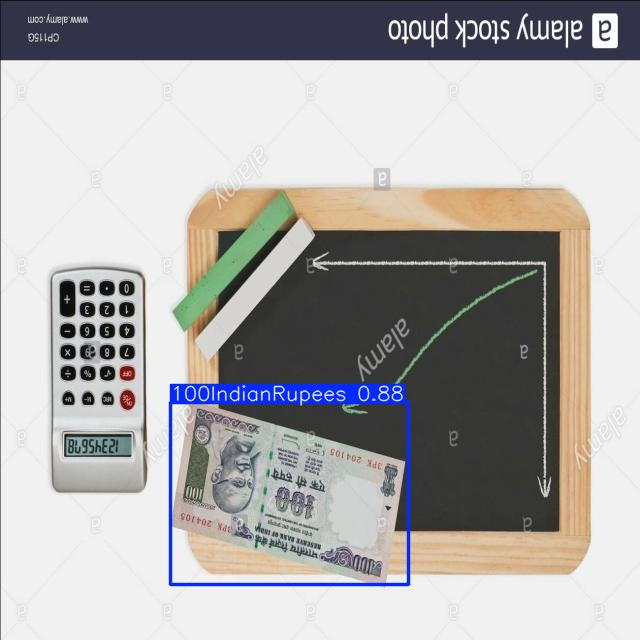

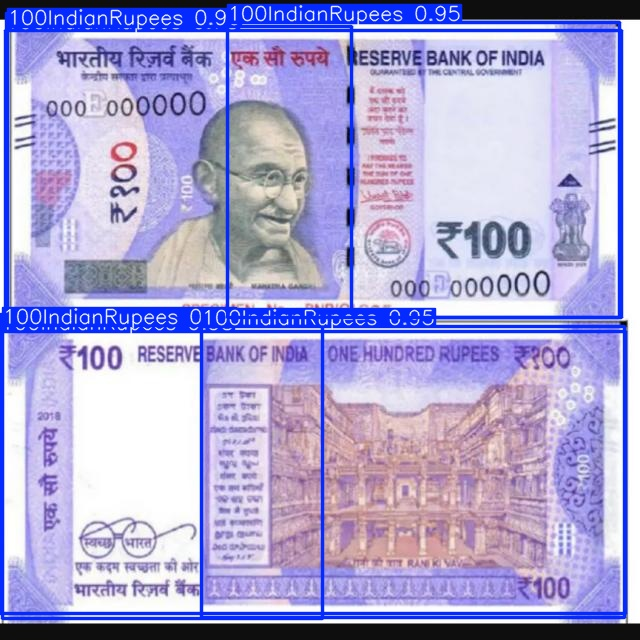

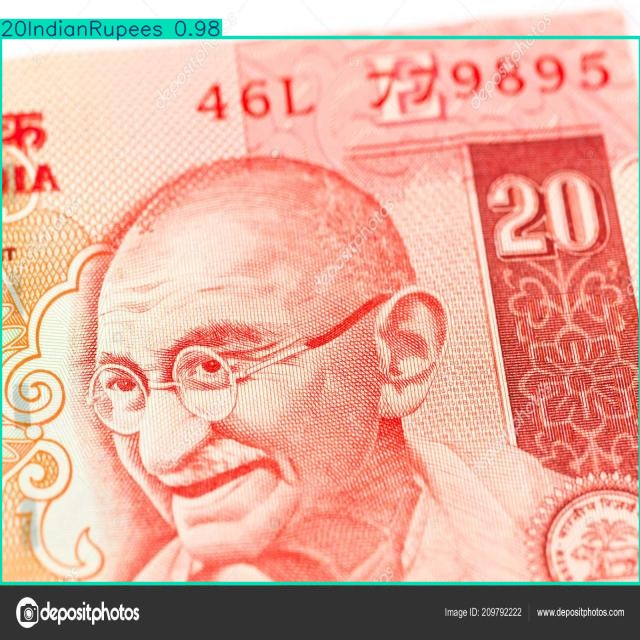

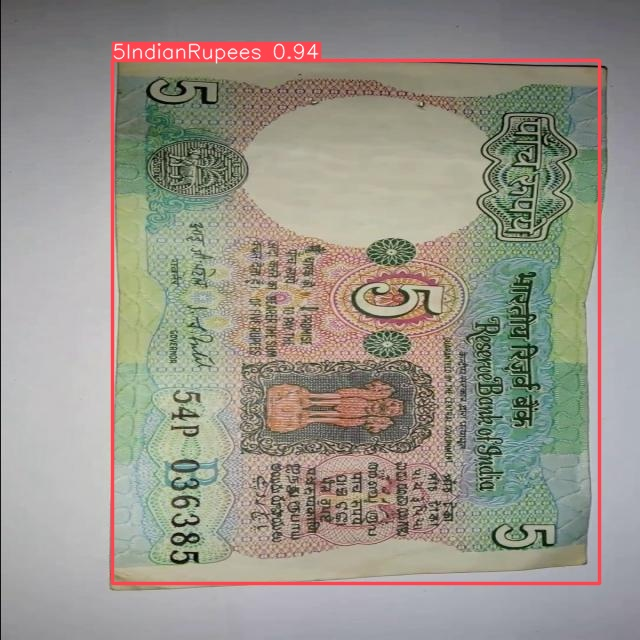

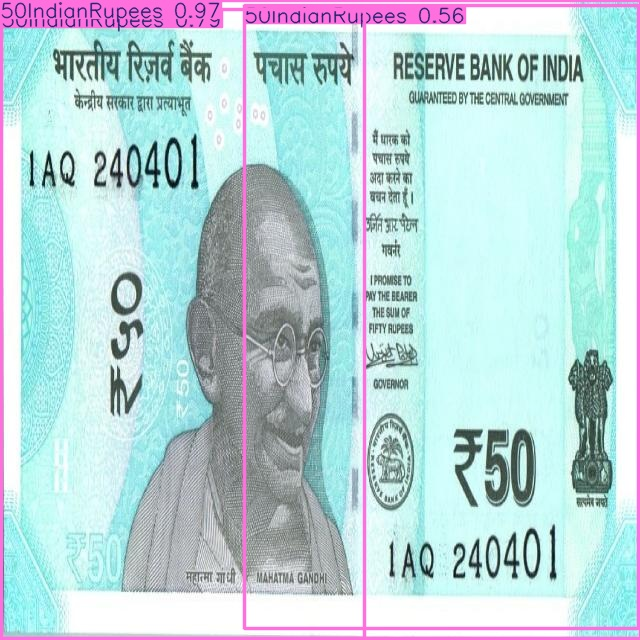

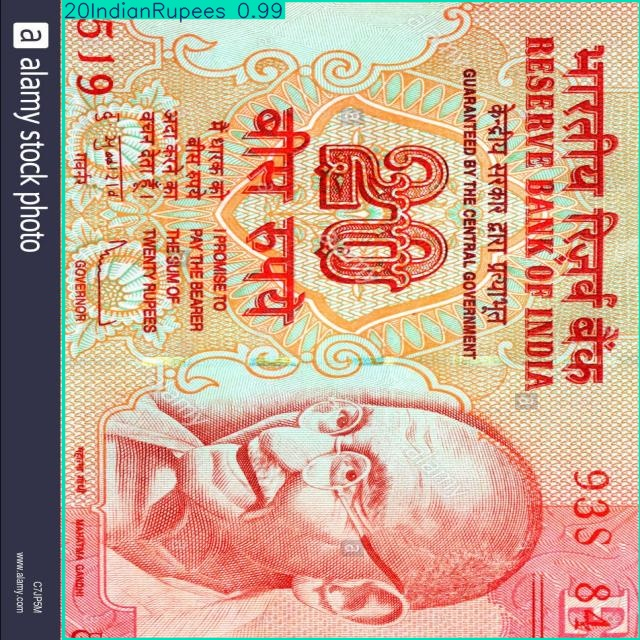

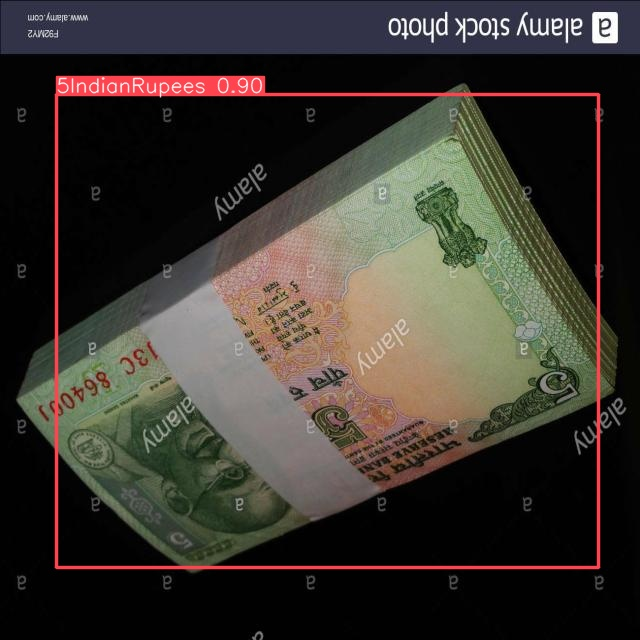

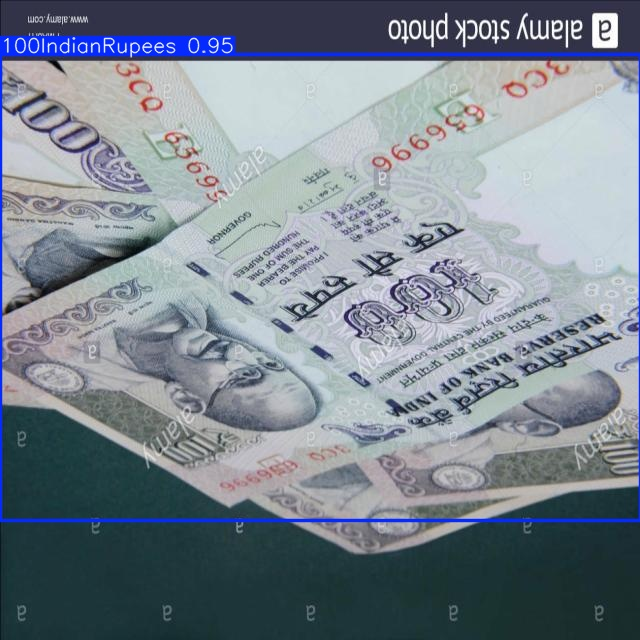

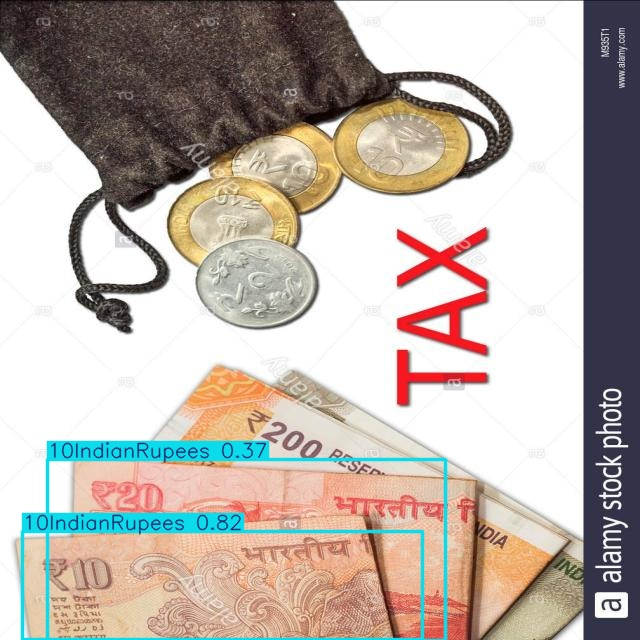

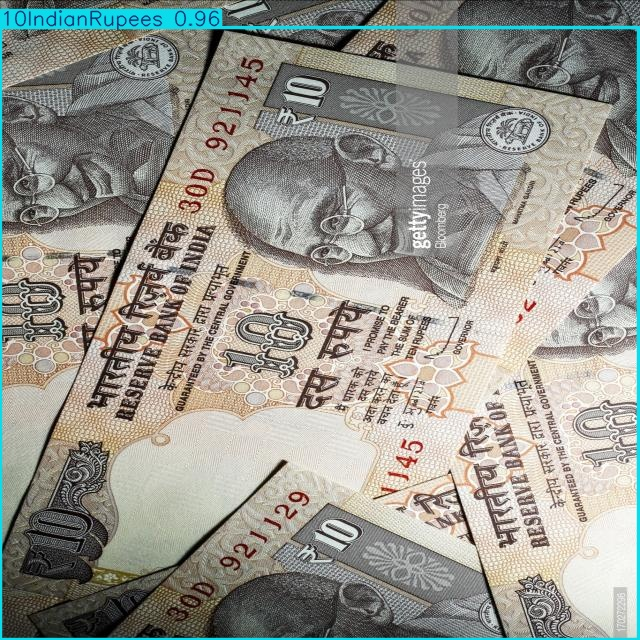

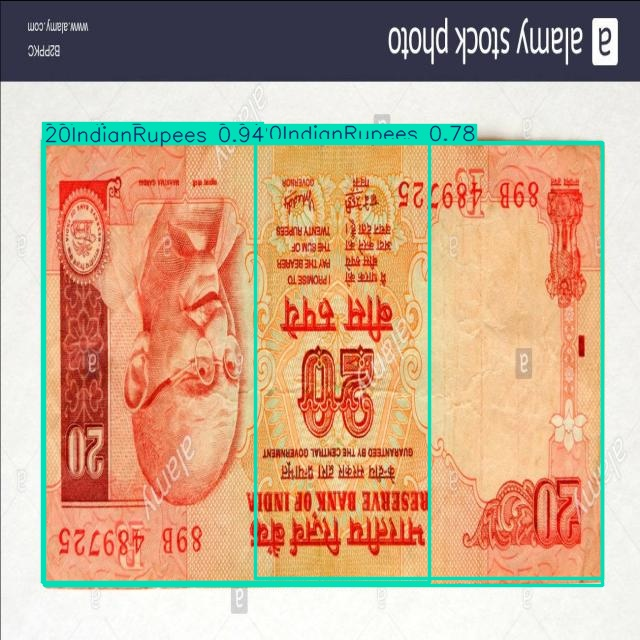

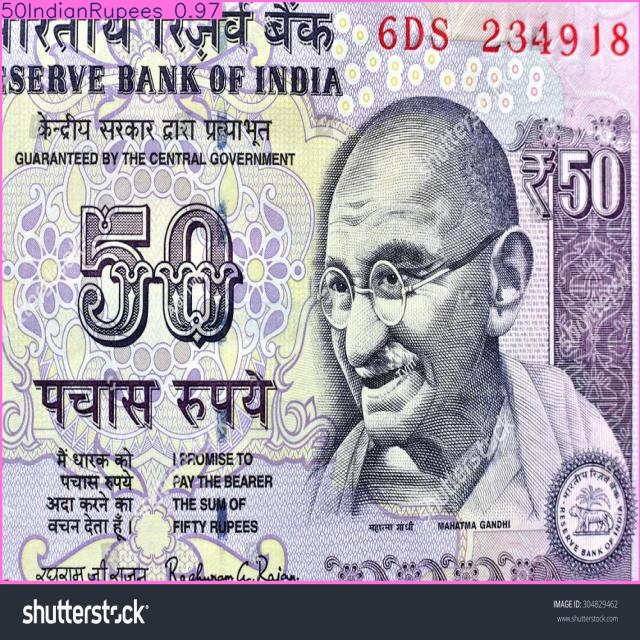

In [34]:
import glob
for image_path in glob.glob('runs/detect/predict/*.jpg')[:15]:
    display(Image(filename=image_path))